# Лабораторная работа 5

In [33]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import copy
import pylab as pl
import time
from IPython import display
import scipy.fftpack

На вход передатчика подается некоторый сигнал во времени. В качестве сигнала
возможно рассмотреть сигнал прямоугольных периодических импульсов.

Реализовать свертку сигнала с некоторым ядром во временной области.

В качестве ядра свертки использовать (а) y=A•exp(-x^2).

In [34]:
def signsin(t):
    return signal.square(1 * np.pi * 5 * t)

In [35]:
N=500
t= np.linspace(0, 1, N, endpoint=False)
A = 1
sign = signsin(t)

t = np.linspace(-5, 5, N//5, endpoint=False)
kernel = A * np.exp(-t**2)


filtered = np.convolve(sign,kernel)

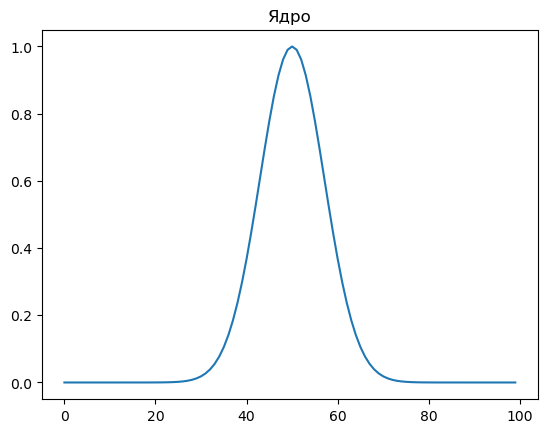

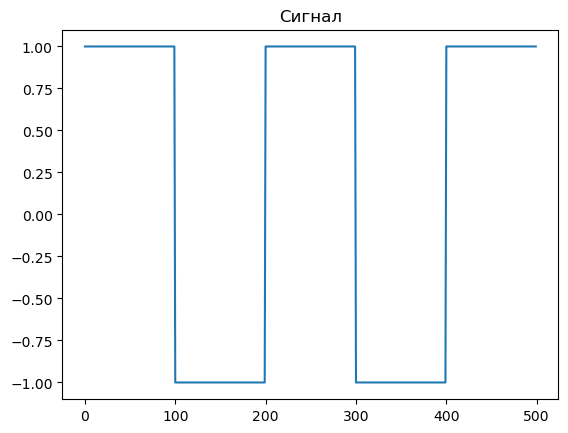

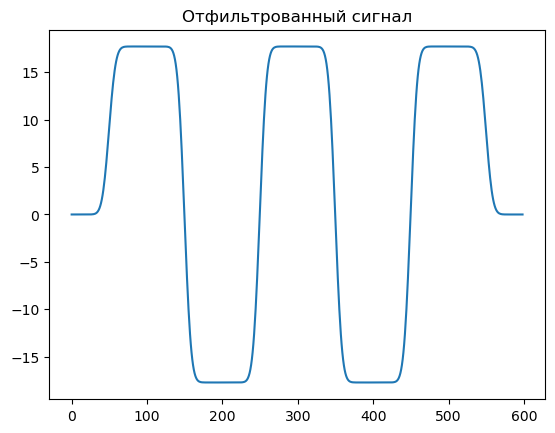

In [36]:
plt.plot(kernel)
plt.title("Ядро")
plt.show()

plt.plot(sign)
plt.title("Сигнал")
plt.show()

plt.plot(filtered)
plt.title("Отфильтрованный сигнал")
plt.show()

----------------------------------

В качестве ядра свертки использовать любую линейную функцию.

In [37]:
t = np.linspace(0, 1, N, endpoint=False)
sign2 = signsin(t)

kernel = np.linspace(-5, 5, N//5, endpoint=False)
filtered = np.convolve(sign2,kernel)

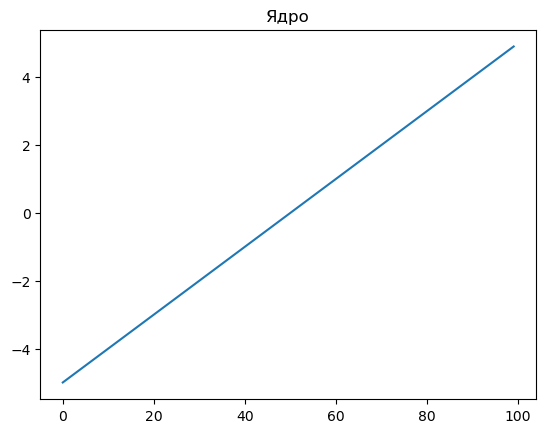

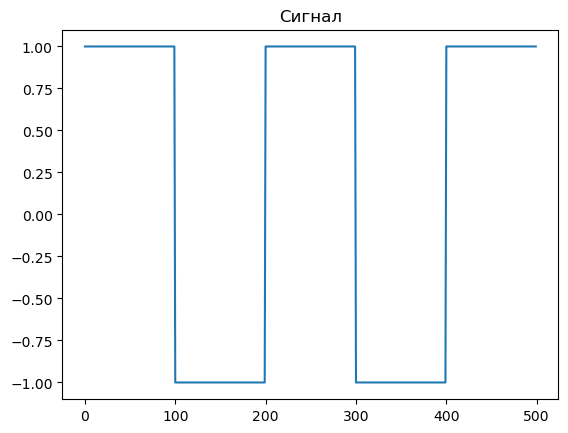

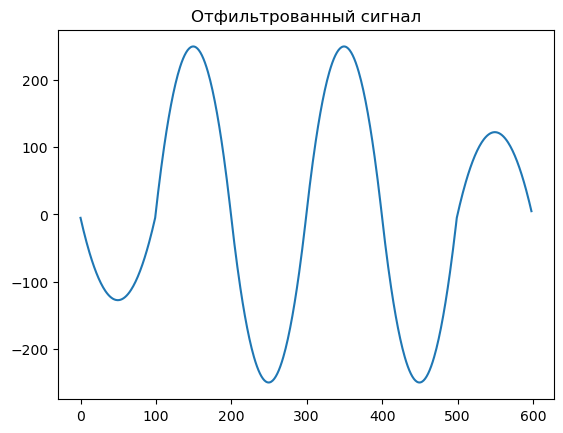

In [38]:
plt.plot(kernel)
plt.title("Ядро")
plt.show()

plt.plot(sign2)
plt.title("Сигнал")
plt.show()

plt.plot(filtered)
plt.title("Отфильтрованный сигнал")
plt.show()

------------------

Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой
алгоритм, осуществляющий свертку сигнала с произвольным ядром.

In [39]:
def convolution(x, h):
    x = np.array(x)
    h = np.array(h)
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1
    y = np.zeros(len_y)
    for i in range(len_x):
        for j in range(len_h):
            y[i+j] += x[i] * h[j]
    return y

In [40]:
t = np.linspace(0, 1, N, endpoint=False)
sign2 = signsin(t)

kernel = np.linspace(-5, 5, N//5, endpoint=False)
my_filtered = convolution(sign2,kernel)
filtered = np.convolve(sign2,kernel)

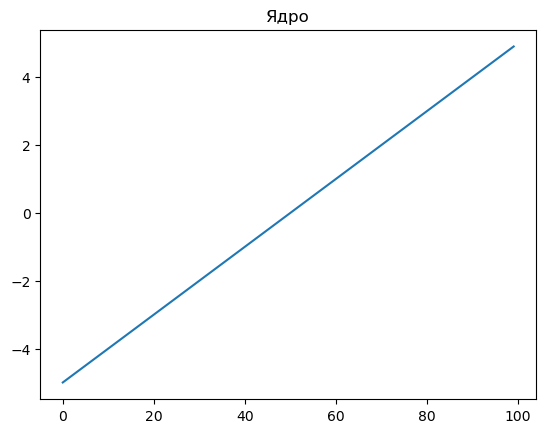

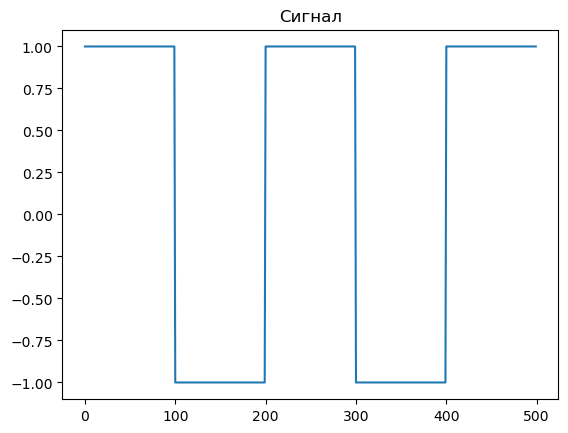

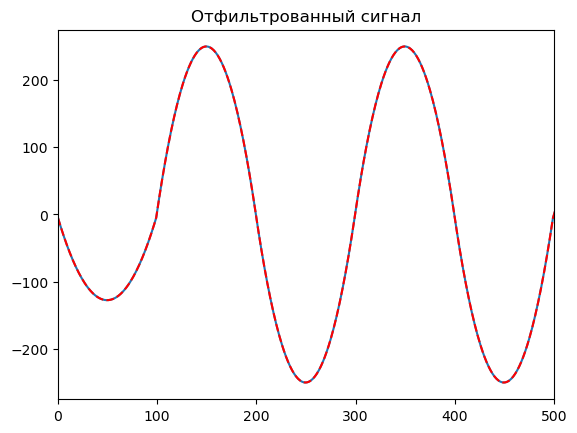

In [41]:
plt.plot(kernel)
plt.title("Ядро")
plt.show()

plt.plot(sign2)
plt.title("Сигнал")
plt.show()

plt.plot(my_filtered)
plt.plot(filtered,'r--')
plt.title("Отфильтрованный сигнал")
plt.xlim(0,500)
plt.show()

-----------------------

Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).
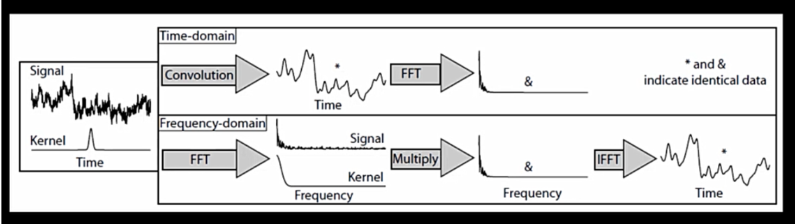

In [42]:
#chastoti pics
x = np.linspace(0, 20, 100, endpoint=False)

signal1 = np.random.normal(10,50,N//10)
signal1= np.pad(signal1, (25, 25), 'constant', constant_values=(0, 0)).tolist()


kernel = np.linspace(-5, 5, N//10, endpoint=False)
kernel= np.pad(kernel, (25, 25), 'constant', constant_values=(0, 0)).tolist()

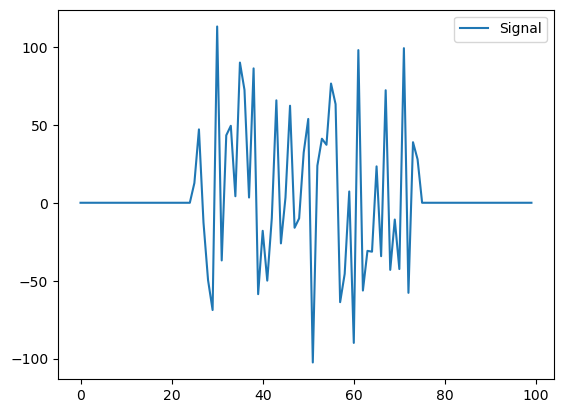

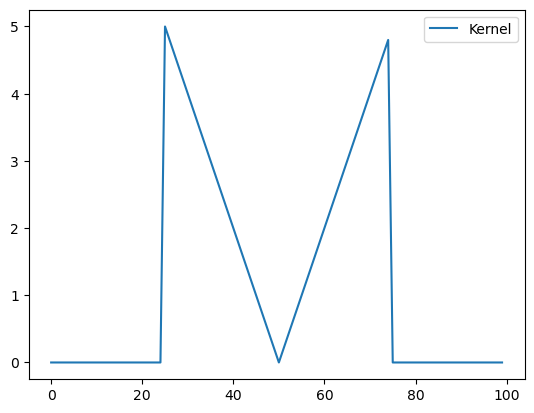

In [43]:
plt.plot(signal1,label='Signal')
plt.legend()
plt.show()

plt.plot(np.abs(kernel), label='Kernel')
plt.legend()
plt.show()

In [44]:
def freq(signal,kernel):
    dataX = np.fft.fft(signal)
    kernel_fft = np.fft.fft(kernel)
    dataY = dataX * kernel_fft
    answ = np.fft.ifft(dataY)
    return answ

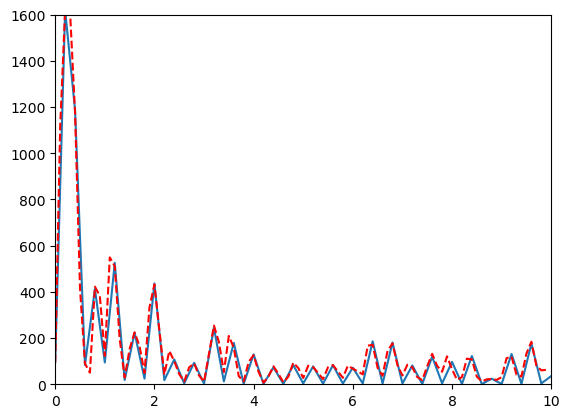

In [57]:
def tim(signal,kernel):
    dataX = np.fft.fft(signal)
    kernel_fft = np.fft.fft(kernel)
    answ = dataX * kernel_fft
    return answ


convers2 = tim(signal1, kernel)
con2 = np.fft.fft(np.convolve(signal1,kernel))

plt.plot(x,abs(convers2[:100])/20)
plt.plot(x/2,abs(con2[:100]/20), 'r--')
plt.xlim(0,10)
plt.ylim(0,1600)
plt.show()

In [17]:
convers = freq(signal1, kernel)
con = np.convolve(signal1,kernel)

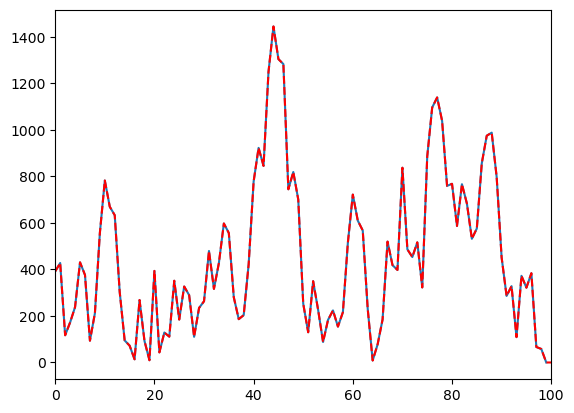

In [18]:
plt.plot(np.roll(abs(convers[0:100]),50))
plt.plot(np.roll(abs(con),149), 'r--')
plt.xlim(0,100)
plt.show()

------------------------

Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной области.
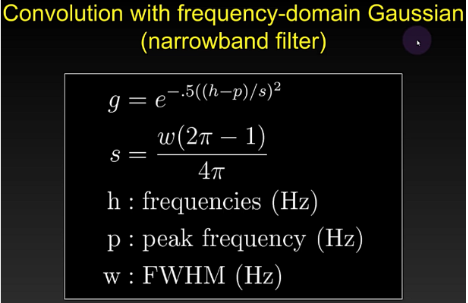

In [19]:
#kermel sgladit' gotovo
N=1000
time  = np.arange(0,3,1/N)

peakf = 0
fwhm  = 25  

hz = np.linspace(0,N,3000) 
s  = fwhm*(2*np.pi-1)/(4*np.pi) 
x  = hz-peakf                       

In [20]:
fx = np.exp(-.5*((hz-peakf)/s)**3) #kernel
signal1 = np.random.normal(0,50,N*3) #signal

dataX = np.fft.fft(signal1)
convers = scipy.fftpack.ifft( dataX*fx )

D:\conda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


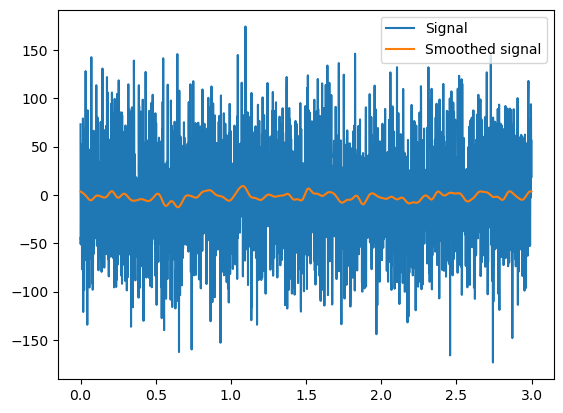

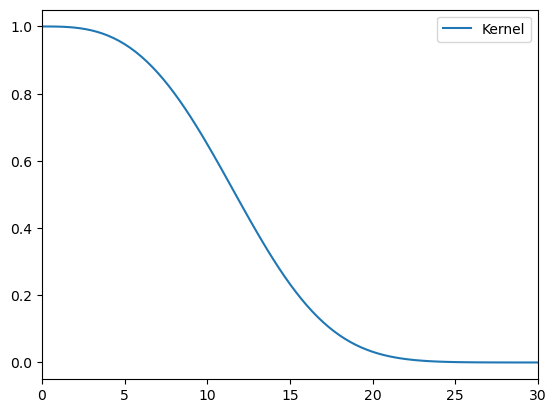

In [21]:
plt.plot(time,signal1,label='Signal')
plt.plot(time,convers,label='Smoothed signal')
plt.legend()
plt.show()

plt.plot(hz,fx, label = 'Kernel')
plt.legend()
plt.xlim(0,30)
plt.show()

#plt.plot(hz,np.abs(dataX)**2,'s-',label='Signal')
#plt.plot(hz,np.abs(dataX*fx)**2, label='Conv')
#plt.legend()
#plt.xlim(0,30)
#plt.ylim(-1e3,1e8)
#plt.show()

Реализовать пункт (4) в частотной области. Убедиться, что результаты совпадают.
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: (а) узкополосной
фильтр (б) фильтр нижних частот

In [22]:
#5a
N=1000
time  = np.arange(0,3,1/N)
x= np.random.normal(0,1, len(time))
hz = np.linspace(0,N,len(time))

p = 10 
fwhm = 5

s  = fwhm*(2*np.pi-1)/(4*np.pi)
g = np.exp(-.5*((hz-p)/s)**2)

fft_x = np.fft.fft(x)

convers_ifft = np.fft.ifft(fft_x*g)
convers = 2*(convers_ifft)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


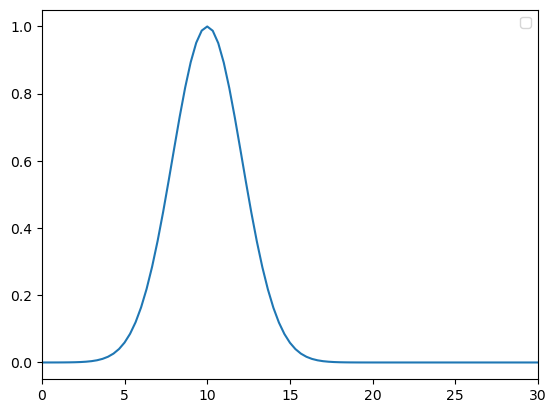

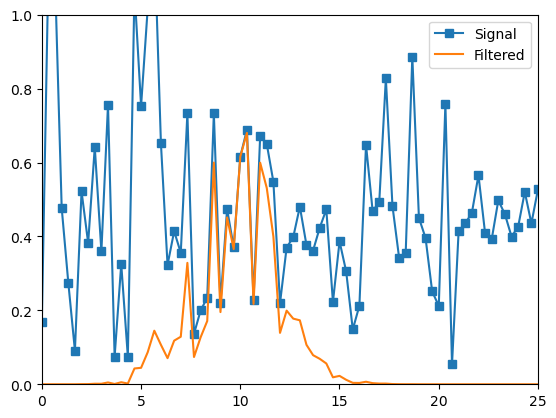

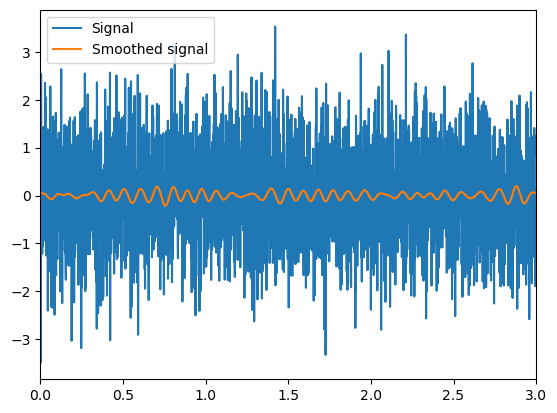

In [23]:
plt.plot(hz,g)
plt.xlim(0,30)
plt.legend()
plt.show()

plt.plot(hz,np.abs(fft_x)/100,'s-',label='Signal')
plt.plot(hz,np.abs(fft_x*g)/100,label='Filtered')
plt.xlim(0,25)
plt.ylim(0,1)
plt.legend()
plt.show()

plt.plot(time,x,label='Signal')
plt.plot(time,convers,label='Smoothed signal')
plt.xlim(0,3)
plt.legend()
plt.show()

In [24]:
#5b
#kernel suzit' gotovo
N = 1000
time  = np.arange(0,3,1/N)
x= np.random.normal(0,1, len(time))
hz = np.linspace(0,N,len(time))

p = 0
fwhm  = 15

s  = fwhm*(2*np.pi-1)/(4*np.pi)
g = np.exp(-.5*((hz-p)/s)**2)

In [25]:
fft_x = np.fft.fft(x)
convers_fft = np.fft.ifft(fft_x*g)
convers = 2*np.real(convers_fft)

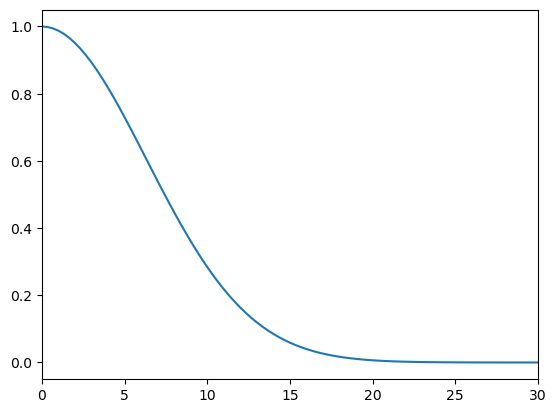

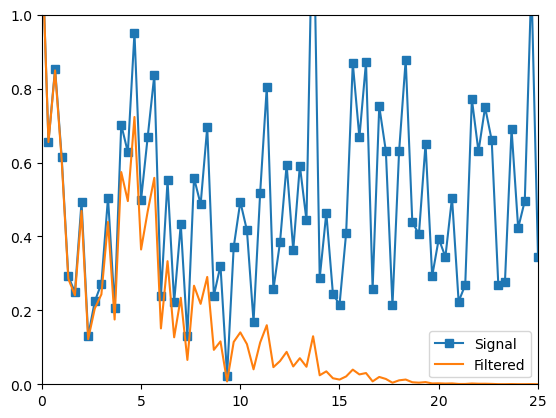

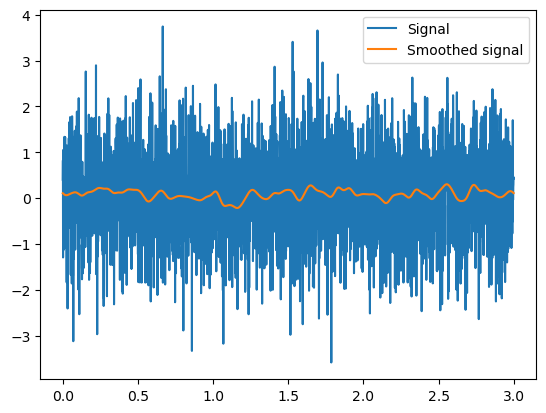

In [26]:
plt.plot(hz,g)
plt.xlim(0,30)
plt.show()

plt.plot(hz,np.abs(fft_x)/100,'s-',label='Signal')
plt.plot(hz,np.abs(fft_x*g)/100,label='Filtered')
plt.xlim(0,25)
plt.ylim(0,1)
plt.legend()
plt.show()

plt.plot(time,x,label='Signal')
plt.plot(time,convers,label='Smoothed signal')
plt.legend()
plt.show()

------------------

(а) Реализовать полосовой фильтр, используя окно Планка.
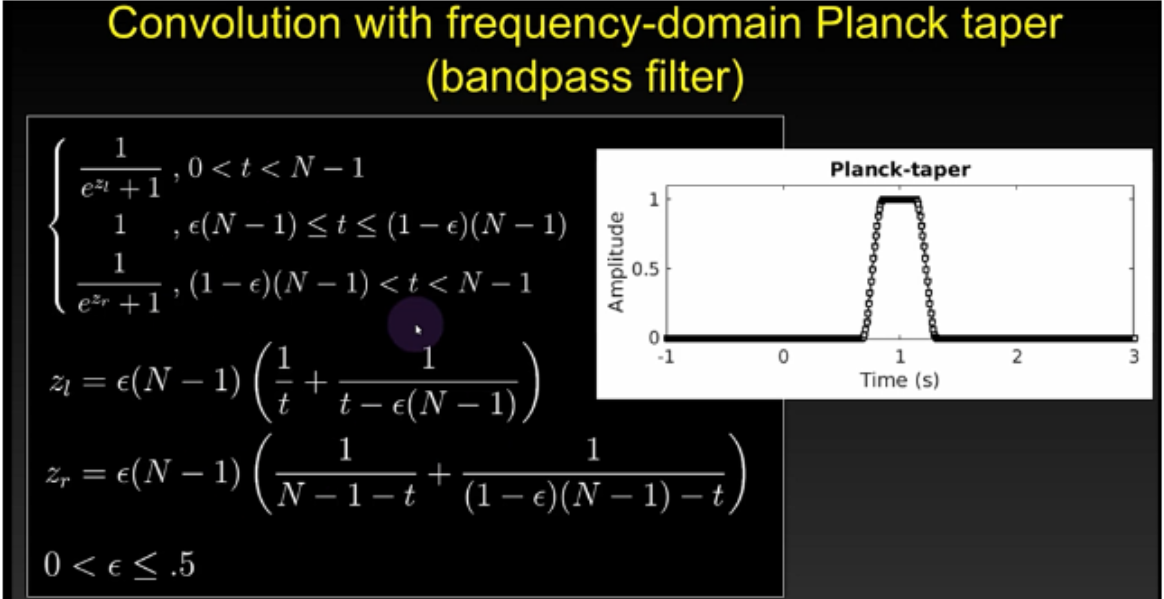

In [27]:
#rashirit' gotovo
frequencies = np.linspace(0,N,len(time))

eta = 0.05

fwhm = 20
p = 20

N = np.round(2*fwhm*len(time)/N) 
k = np.arange(1,N+1) 

In [28]:
Z_a = eta*(N-1) * (1/k + 1/(k-eta*(N-1)))               
Z_b = eta*(N-1) * (1/(N-1-k) + 1/((1-eta)*(N-1)-k))                                 

a1 = 1/(np.exp(Z_a[range(0,int(np.floor(eta*(N-1))))])+1)
a2 = np.ones(int(np.ceil((1-eta)*(N-1))-np.floor(eta*(N-1))))
a3 = 1/(np.exp(Z_b[range(int(np.ceil((1-eta)*(N-2))),len(Z_b)-1)])+1)

C:\Users\79132\AppData\Local\Temp\ipykernel_16412\210092525.py:2: RuntimeWarning: divide by zero encountered in divide
  Z_b = eta*(N-1) * (1/(N-1-k) + 1/((1-eta)*(N-1)-k))


In [29]:
plancktaper = np.concatenate((a1,a2,a3),axis=0)
px = np.zeros(len(frequencies))
pidx = range(int(np.max((0,np.argmin((frequencies-p)**2)-np.floor(N/2)+1))), int(np.argmin((frequencies-p)**2)+np.floor(N/2)+1))
px[np.round(pidx)] = plancktaper

planck_taper = 2*np.fft.ifft(np.fft.fft(x)*px)

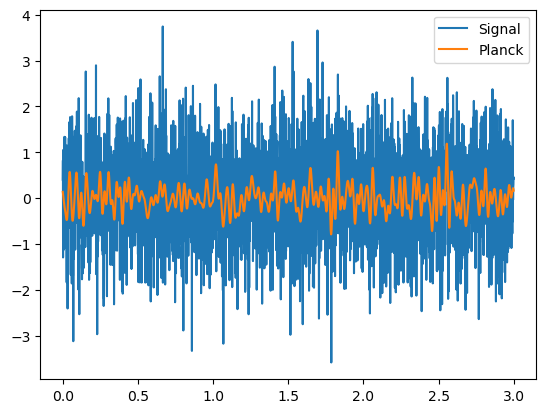

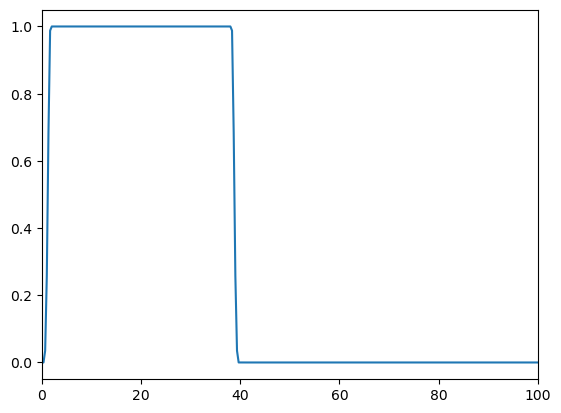

In [30]:
#6
plt.plot(time,x,label='Signal')
plt.plot(time, planck_taper, label='Planck')
plt.legend()
plt.show()

plt.plot(frequencies,np.abs(px)**2)
plt.xlim(0,100)
plt.show()

-------------------

Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка.

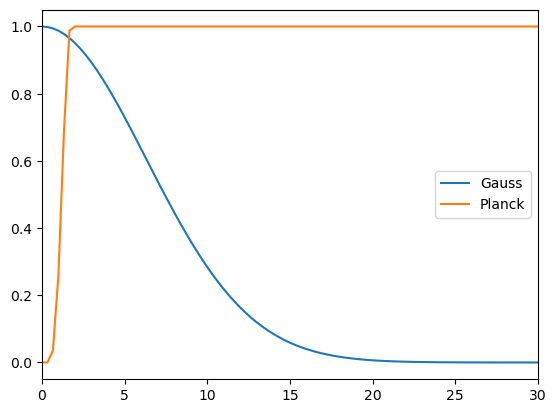

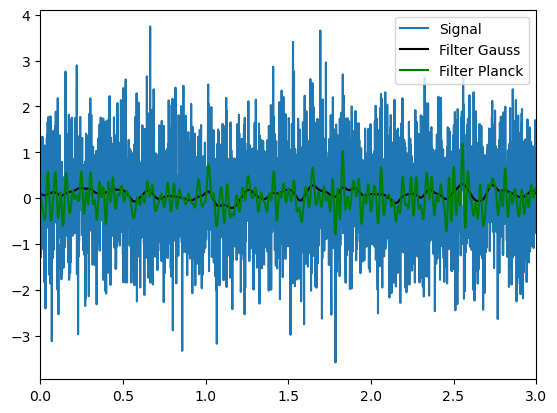

In [31]:
#7
plt.plot(hz,g, label='Gauss')
plt.plot(frequencies,np.abs(px)**2,  label='Planck')
plt.legend()
plt.xlim(0,30)
plt.show()

plt.plot(time,x,label='Signal')
plt.plot(time,convers,'black',label='Filter Gauss')
plt.plot(time, planck_taper,'g' , label='Filter Planck')
plt.xlim(0,3)
plt.legend()
plt.show()